## Data Analysis

In this notebook, we utilize the Green Metric Tool API to analyze the measurements collected during simulated email user sessions. This involves processing and interpreting data related to energy consumption of basic email operations across different providers, assessing performance metrics, and comparing the impact of different factors such as ad-blocking.


#### Load the libraries

In [1]:
import pandas as pd # For data manipulation
import numpy as np # For data manipulation
import requests # For HTTP Requests to the API
import seaborn as sns # For charts
from IPython.display import display # To dataframe displaying
import scipy.stats as stats # For stats
from itertools import combinations

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

#### Define the URL and other constants to query the GMT API

In [2]:
URL = 'http://api.green-coding.internal:9142'
REPO = '/home/jason/memoire'
RUNS = '/v1/runs'
NOTES = '/v1/notes/'
MEASUREMENTS = '/v1/measurements/single/'

TESTS = [
    '1_gmail_login_adblock.json',
    '1_gmail_login_noadblock.json',
    '1_outlook_login_adblock.json',
    '1_outlook_login_noadblock.json',
    '1_proton_login_adblock.json',
    '1_proton_login_noadblock.json',
    '2_gmail_answer_adblock.json',
    '2_gmail_answer_noadblock.json',
    '2_gmail_attachment_adblock.json',
    '2_gmail_attachment_noadblock.json',
    '2_gmail_delete_adblock.json',
    '2_gmail_delete_noadblock.json',
    '2_gmail_noattachment_adblock.json',
    '2_gmail_noattachment_noadblock.json',
    '2_outlook_answer_adblock.json',
    '2_outlook_answer_noadblock.json',
    '2_outlook_attachment_adblock.json',
    '2_outlook_attachment_noadblock.json',
    '2_outlook_delete_adblock.json',
    '2_outlook_delete_noadblock.json',
    '2_outlook_noattachment_adblock.json',
    '2_outlook_noattachment_noadblock.json',
    '2_proton_answer_adblock.json',
    '2_proton_answer_noadblock.json',
    '2_proton_attachment_adblock.json',
    '2_proton_attachment_noadblock.json',
    '2_proton_delete_adblock.json',
    '2_proton_delete_noadblock.json',
    '2_proton_noattachment_adblock.json',
    '2_proton_noattachment_noadblock.json',
]



### Define functions to:
    - get all the runs infos (test_name, run_ids, time)
    - get all run ids of tests which names match a substring
    - get the test name of a given run id
    - get the notes from a given run id
    - print the logs of a given run id
    - get the measurment of a given run id

In [5]:
# Function to get all runs
def get_runs():
    try:
        # Fetch data from the API
        response = requests.get(URL + RUNS)
        response.raise_for_status()  # Check if the request was successful
        
        data = response.json()
        
        # Convert the relevant part of the data into a DataFrame
        runs = pd.DataFrame.from_dict(data['data'])
        runs = runs[[0, 1, 4]]
        runs.columns = ['id', 'name', 'time'] 
        
        return runs
    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e}")
    except ValueError as e:
        print(f"Failed to decode JSON: {e}")

# Function to get all the run IDs for a test name containing a given substring
def get_ids(substring=""):
    runs = get_runs()
    filtered_runs = runs[runs['name'].str.contains(substring, na=False)]
    return filtered_runs['id'].tolist()

# Function to get the test name of a run given its ID
def get_name(id):
    runs = get_runs()
    run = runs[runs['id'] == id]
    
    if not run.empty:
        return run.iloc[0]['name']
    else:
        return None

# Function to create the notes (i.e., logs) DataFrame from an ID
def get_notes(id):
    try:
        response = requests.get(URL + NOTES + id)
        response.raise_for_status()  # Check if the request was successful
        data = response.json()
        notes = pd.DataFrame.from_dict(data['data'])
        
        # Set the appropriate column names
        notes.columns = ['id', 'container', 'log', 'time']
        
        return notes
        
    except Exception as e:
        print(f"Failed to fetch or process notes for ID {id}: {e}")
        # Return an empty DataFrame with the expected column names
        return pd.DataFrame(columns=['id', 'container', 'log', 'time'])

def get_logs(id):
    # Fetch the notes (logs) DataFrame for the given ID
    notes_df = get_notes(id)
    
    if notes_df.empty:
        print(f"No logs found for ID {id}.")
        return
    
    # Sort the logs by time
    sorted_logs = notes_df.sort_values(by='time')
    
    # Print the logs in order
    for index, row in sorted_logs.iterrows():
        timestamp = row['time']
        log_entry = row['log']
        print(f"Time: {timestamp}, Log: {log_entry}")

# Function to get the measurement DataFrame from an ID
def get_measurements(id):
    try:
        response = requests.get(URL + MEASUREMENTS + id)
        response.raise_for_status()  # Check if the request was successful
        data = response.json()
        measurement = pd.DataFrame.from_dict(data['data'])
        
        # Set the appropriate column names
        measurement.columns = ['detail_name', 'time', 'metric', 'value', 'unit']
        return measurement

    except Exception as e:
        print(f"Failed to fetch measurements for ID {id}: {e}")
        # Return an empty DataFrame in case of an error
        return pd.DataFrame(columns=['detail_name', 'time', 'metric', 'value', 'unit'])


# Test:
ids = get_ids("2_gmail_answer")
for id in ids:
    test_name = get_name(id)
    if test_name:
        print(f"Test Name: {test_name}, ID: {id}")
    else:
        print(f"Test not found for ID: {id}")
id = ids[0]
get_notes(id).head()

Test Name: 2_gmail_answer_adblock.json, ID: 7c661c23-545e-4635-bc28-258901b22c8c
Test Name: 2_gmail_answer_adblock.json, ID: 5a29b988-e398-4ee0-8270-d65419ee15c1
Test Name: 2_gmail_answer_noadblock.json, ID: a1a1c211-7db2-48b8-863f-77617dac62ca
Test Name: 2_gmail_answer_noadblock.json, ID: fc2da1a6-8121-4aa9-b1d7-6da4a17e3779
Test Name: 2_gmail_answer_noadblock.json, ID: f0498b43-3d0f-4e3a-a90c-3ace160a3917
Test Name: 2_gmail_answer_noadblock.json, ID: 69bedf33-d216-435f-a72a-2bd90da72ff8
Test Name: 2_gmail_answer_noadblock.json, ID: 2897e58a-c71a-40ce-a81f-8e80f386e052
Test Name: 2_gmail_answer_adblock.json, ID: 62aae4ee-0072-4715-a95f-c05e2806d7dd
Test Name: 2_gmail_answer_adblock.json, ID: 0cb959ba-859a-4b2d-92f4-8a7398891f8a
Test Name: 2_gmail_answer_adblock.json, ID: 6b4bfc0e-8e34-493c-a8d0-829cc6b9e330
Test Name: 2_gmail_answer_adblock.json, ID: 81dae85a-9116-49f4-8fa7-45f895dc08f0
Test Name: 2_gmail_answer_adblock.json, ID: da5d76d9-e8fb-40ce-bfb3-cbadceafcfc9


,id,container,log,time
0,7c661c23-545e-4635-bc28-258901b22c8c,automated-session,[92m[THREAD 1 jason.kayembe.ulb.test@gmail.co...,1723946879943801
1,7c661c23-545e-4635-bc28-258901b22c8c,automated-session,[92m[THREAD 1 jason.kayembe.ulb.test@gmail.co...,1723946879785042
2,7c661c23-545e-4635-bc28-258901b22c8c,automated-session,[92m[THREAD 1 jason.kayembe.ulb.test@gmail.co...,1723946879785007
3,7c661c23-545e-4635-bc28-258901b22c8c,automated-session,[92m[THREAD 1 jason.kayembe.ulb.test@gmail.co...,1723946874360463
4,7c661c23-545e-4635-bc28-258901b22c8c,automated-session,[92m[THREAD 1 jason.kayembe.ulb.test@gmail.co...,1723946833360116


### Define a function to get the name of the tests that failed during experiment
Those failure can be spotted in the logs of the runs. Whenever Selenium is facing a problem, the word 'Stacktrace' appears in the log so we can use this to identify the failing runs. 

In [6]:
# Function to check names with enough valid runs
def check_names_with_enough_runs(names, min_runs=5):
    failed_tests = []
    valid_tests = {}

    for name in names:
        ids = get_ids(name)
        valid_ids = []
        valid_runs_count = 0

        for id in ids:
            notes_data = get_notes(id)

            # Proceed only if notes_data is not empty
            if not notes_data.empty:
                # Check if logs do not contain 'Stacktrace', '[ERROR]' or special condition for '_answer_'
                contains_error = notes_data['log'].str.contains('Stacktrace|\\[ERROR\\]', na=False).any()
                
                # Additional check for '_answer_' tests (logs must contain 'START: reply')
                if '_answer_' in name and not notes_data['log'].str.contains('START: reply', na=False).any():
                    contains_error = True

                # Additional check for '_delete_' tests (logs must contain 'START: delete_first')
                if '_delete_' in name and not notes_data['log'].str.contains('START: delete_first', na=False).any():
                    contains_error = True

                # If there are no error, consider the run valid
                if not contains_error:
                    valid_ids.append(id)
                    valid_runs_count += 1

                # Break if we already have enough valid runs
                if valid_runs_count >= min_runs:
                    break
            else:
                print(f"No data available for ID {id}")

        # If fewer than min_runs valid runs, add to failed_tests
        if valid_runs_count < min_runs:
            missing_runs = min_runs - valid_runs_count
            failed_tests.append((name, missing_runs))
        else:
            # Store the test name and the valid IDs
            valid_tests[name] = valid_ids[:min_runs]  # Only store up to min_runs valid IDs

    return valid_tests, failed_tests

# Verify tests
valid_tests, failed_tests = check_names_with_enough_runs(TESTS)

# Print valid tests with corresponding valid ids
print("Valid tests with enough runs:")
for test, ids in valid_tests.items():
    print(f" - {test}")

# Print failed tests with missing runs count
print("\nTests with fewer than 5 valid runs:")
for test, missing_runs in failed_tests:
    print(f" - {test}: Missing {missing_runs} runs")



Valid tests with enough runs:
 - 1_gmail_login_adblock.json
 - 1_gmail_login_noadblock.json
 - 1_outlook_login_adblock.json
 - 1_outlook_login_noadblock.json
 - 1_proton_login_adblock.json
 - 1_proton_login_noadblock.json
 - 2_gmail_answer_adblock.json
 - 2_gmail_answer_noadblock.json
 - 2_gmail_attachment_adblock.json
 - 2_gmail_attachment_noadblock.json
 - 2_gmail_delete_adblock.json
 - 2_gmail_delete_noadblock.json
 - 2_gmail_noattachment_adblock.json
 - 2_gmail_noattachment_noadblock.json
 - 2_outlook_answer_adblock.json
 - 2_outlook_answer_noadblock.json
 - 2_outlook_attachment_adblock.json
 - 2_outlook_attachment_noadblock.json
 - 2_outlook_delete_adblock.json
 - 2_outlook_delete_noadblock.json
 - 2_outlook_noattachment_adblock.json
 - 2_outlook_noattachment_noadblock.json
 - 2_proton_answer_adblock.json
 - 2_proton_answer_noadblock.json
 - 2_proton_attachment_adblock.json
 - 2_proton_attachment_noadblock.json
 - 2_proton_delete_adblock.json
 - 2_proton_delete_noadblock.json
 - 2

### Define a DataFrame to Map Providers and Actions to Tests and Actions to Measure

We use a DataFrame to organize and map each provider and action to the corresponding test file and actions to measure. For instance, to assess the 'answer' action for the 'gmail' provider with adblock enabled, we look up the entry `['gmail_adblock', 'answer']`. This entry directs us to the test file `'2_gmail_answer_adblock.json'` and specifies the actions to measure: `'read_first'` and `'reply'`.

For each action, we will identify the START/END timestamp pairs from the logs and compute the energy consumption over the intervals between START and END plus an additional 5 seconds to account for late website reaction


In [7]:
PROVIDERS = ['gmail_adblock',
             'gmail_noadblock',
             'outlook_adblock',
             'outlook_noadblock',
             'proton_adblock',
             'proton_noadblock']

ACTIONS = ['idle',
           'login',
           'logout',
           'noattachment',
           'attachment',
           'answer',
           'delete']

TESTS_AND_ACTIONS = pd.DataFrame({
    'idle': {
        'gmail_adblock': ('1_gmail_login_adblock.json', ['login', 'logout']),
        'gmail_noadblock': ('1_gmail_login_noadblock.json', ['login', 'logout']),
        'outlook_adblock': ('1_outlook_login_adblock.json', ['login', 'logout']),
        'outlook_noadblock': ('1_outlook_login_noadblock.json', ['login', 'logout']),
        'proton_adblock': ('1_proton_login_adblock.json', ['login', 'logout']),
        'proton_noadblock': ('1_proton_login_noadblock.json', ['login', 'logout']),
    },
    'login': {
        'gmail_adblock': ('1_gmail_login_adblock.json', ['login']),
        'gmail_noadblock': ('1_gmail_login_noadblock.json', ['login']),
        'outlook_adblock': ('1_outlook_login_adblock.json', ['login']),
        'outlook_noadblock': ('1_outlook_login_noadblock.json', ['login']),
        'proton_adblock': ('1_proton_login_adblock.json', ['login']),
        'proton_noadblock': ('1_proton_login_noadblock.json', ['login']),
    },
    'logout': {
        'gmail_adblock': ('1_gmail_login_adblock.json', ['logout']),
        'gmail_noadblock': ('1_gmail_login_noadblock.json', ['logout']),
        'outlook_adblock': ('1_outlook_login_adblock.json', ['logout']),
        'outlook_noadblock': ('1_outlook_login_noadblock.json', ['logout']),
        'proton_adblock': ('1_proton_login_adblock.json', ['logout']),
        'proton_noadblock': ('1_proton_login_noadblock.json', ['logout']),
    },
    'noattachment': {
        'gmail_adblock': ('2_gmail_noattachment_adblock.json', ['send_mail']),
        'gmail_noadblock': ('2_gmail_noattachment_noadblock.json', ['send_mail']),
        'outlook_adblock': ('2_outlook_noattachment_adblock.json', ['send_mail']),
        'outlook_noadblock': ('2_outlook_noattachment_noadblock.json', ['send_mail']),
        'proton_adblock': ('2_proton_noattachment_adblock.json', ['send_mail']),
        'proton_noadblock': ('2_proton_noattachment_noadblock.json', ['send_mail']),
    },
    'attachment': {
        'gmail_adblock': ('2_gmail_attachment_adblock.json', ['send_mail']),
        'gmail_noadblock': ('2_gmail_attachment_noadblock.json', ['send_mail']),
        'outlook_adblock': ('2_outlook_attachment_adblock.json', ['send_mail']),
        'outlook_noadblock': ('2_outlook_attachment_noadblock.json', ['send_mail']),
        'proton_adblock': ('2_proton_attachment_adblock.json', ['send_mail']),
        'proton_noadblock': ('2_proton_attachment_noadblock.json', ['send_mail']),
    },
    'answer': {
        'gmail_adblock': ('2_gmail_answer_adblock.json', ['read_first', 'reply']),
        'gmail_noadblock': ('2_gmail_answer_noadblock.json', ['read_first', 'reply']),
        'outlook_adblock': ('2_outlook_answer_adblock.json', ['read_first', 'reply']),
        'outlook_noadblock': ('2_outlook_answer_noadblock.json', ['read_first', 'reply']),
        'proton_adblock': ('2_proton_answer_adblock.json', ['read_first', 'reply']),
        'proton_noadblock': ('2_proton_answer_noadblock.json', ['read_first', 'reply']),
    },
    'delete': {
        'gmail_adblock': ('2_gmail_delete_adblock.json', ['read_first', 'delete_first']),
        'gmail_noadblock': ('2_gmail_delete_noadblock.json', ['read_first', 'delete_first']),
        'outlook_adblock': ('2_outlook_delete_adblock.json', ['read_first', 'delete_first']),
        'outlook_noadblock': ('2_outlook_delete_noadblock.json', ['read_first', 'delete_first']),
        'proton_adblock': ('2_proton_delete_adblock.json', ['read_first', 'delete_first']),
        'proton_noadblock': ('2_proton_delete_noadblock.json', ['read_first', 'delete_first']),
    }
})
TESTS_AND_ACTIONS.head(6)

,idle,login,logout,noattachment,attachment,answer,delete
gmail_adblock,"(1_gmail_login_adblock.json, [login, logout])","(1_gmail_login_adblock.json, [login])","(1_gmail_login_adblock.json, [logout])","(2_gmail_noattachment_adblock.json, [send_mail])","(2_gmail_attachment_adblock.json, [send_mail])","(2_gmail_answer_adblock.json, [read_first, rep...","(2_gmail_delete_adblock.json, [read_first, del..."
gmail_noadblock,"(1_gmail_login_noadblock.json, [login, logout])","(1_gmail_login_noadblock.json, [login])","(1_gmail_login_noadblock.json, [logout])","(2_gmail_noattachment_noadblock.json, [send_ma...","(2_gmail_attachment_noadblock.json, [send_mail])","(2_gmail_answer_noadblock.json, [read_first, r...","(2_gmail_delete_noadblock.json, [read_first, d..."
outlook_adblock,"(1_outlook_login_adblock.json, [login, logout])","(1_outlook_login_adblock.json, [login])","(1_outlook_login_adblock.json, [logout])","(2_outlook_noattachment_adblock.json, [send_ma...","(2_outlook_attachment_adblock.json, [send_mail])","(2_outlook_answer_adblock.json, [read_first, r...","(2_outlook_delete_adblock.json, [read_first, d..."
outlook_noadblock,"(1_outlook_login_noadblock.json, [login, logout])","(1_outlook_login_noadblock.json, [login])","(1_outlook_login_noadblock.json, [logout])","(2_outlook_noattachment_noadblock.json, [send_...","(2_outlook_attachment_noadblock.json, [send_ma...","(2_outlook_answer_noadblock.json, [read_first,...","(2_outlook_delete_noadblock.json, [read_first,..."
proton_adblock,"(1_proton_login_adblock.json, [login, logout])","(1_proton_login_adblock.json, [login])","(1_proton_login_adblock.json, [logout])","(2_proton_noattachment_adblock.json, [send_mail])","(2_proton_attachment_adblock.json, [send_mail])","(2_proton_answer_adblock.json, [read_first, re...","(2_proton_delete_adblock.json, [read_first, de..."
proton_noadblock,"(1_proton_login_noadblock.json, [login, logout])","(1_proton_login_noadblock.json, [login])","(1_proton_login_noadblock.json, [logout])","(2_proton_noattachment_noadblock.json, [send_m...","(2_proton_attachment_noadblock.json, [send_mail])","(2_proton_answer_noadblock.json, [read_first, ...","(2_proton_delete_noadblock.json, [read_first, ..."


### Extract START and END Timestamps for Given Functions

The `get_start_end_pairs` function extracts START and END timestamps from the logs for one or two specified function names. If two function names are provided, it identifies the first START timestamp from the first function and the last END timestamp from the second function. This ensures that we capture the full duration of interest, including an additional 5 seconds after the END timestamp to account for processing delays. 

If either function's logs do not contain valid START or END entries, the function returns an empty list. Otherwise, it returns a list containing the calculated time interval between the identified START and END timestamps.

A special case is treated : To measure an idling behaviour we consider the interval from the END of the login call to the START of the logout call


In [8]:
def get_start_end_pairs(function_names, id):
    notes = get_notes(id)

    if notes.empty:
        return []

    # Identify the function names
    first_function_name = function_names[0]
    second_function_name = function_names[1] if len(function_names) > 1 else first_function_name

    # Special case: Handle "login" and "logout" idling behaviour
    if 'login' in function_names and 'logout' in function_names:
        # Filter for login and logout entries
        filtered_login = notes[notes['log'].str.contains('login', na=False)]
        filtered_logout = notes[notes['log'].str.contains('logout', na=False)]

        # Separate START and END entries
        login_ends = filtered_login[filtered_login['log'].str.contains('END', na=False)]
        logout_starts = filtered_logout[filtered_logout['log'].str.contains('START', na=False)]

        # Sort by time
        login_ends = login_ends.sort_values(by='time')
        logout_starts = logout_starts.sort_values(by='time')

        # Check if there are any valid login ENDs and logout STARTs
        if login_ends.empty or logout_starts.empty:
            return []

        # Use the last END login and the first START logout
        start_time = login_ends.iloc[-1]['time'] + 5*10e6  # Last login END + 5 seconds
        end_time = logout_starts.iloc[0]['time']  # First logout START

        return [(start_time, end_time)]

    # General case for other functions
    filtered_first_func = notes[notes['log'].str.contains(first_function_name, na=False)]
    filtered_second_func = notes[notes['log'].str.contains(second_function_name, na=False)]

    # Separate START and END entries
    starts_first_func = filtered_first_func[filtered_first_func['log'].str.contains('START', na=False)]
    ends_second_func = filtered_second_func[filtered_second_func['log'].str.contains('END', na=False)]

    # Sort by time
    starts_first_func = starts_first_func.sort_values(by='time')
    ends_second_func = ends_second_func.sort_values(by='time')

    # Check if we have valid start and end timestamps
    if starts_first_func.empty or ends_second_func.empty:
        return []

    # Get the first START and the last END
    start_time = starts_first_func.iloc[0]['time']
    end_time = ends_second_func.iloc[-1]['time'] + 5*10e6  # Add 5 seconds to the END time in microseconds

    return [(start_time, end_time)]


### Create and Populate Metric DataFrames

**Creating an Empty DataFrame:**

The `create_metric_dataframe` function initializes an empty DataFrame for a specified metric. The DataFrame is structured with providers as rows and actions as columns. Each cell is initially set to an empty list, which will later store the measurements from different runs for that provider and action.

**Computing Metric Values:**

The `compute_metric_for_action` function calculates the total value of a specified metric for a given provider and action. It uses the test names and actions from the `TESTS_AND_ACTIONS` DataFrame to identify relevant IDs. For each ID, it fetches the log notes and measurement data, extracts START and END timestamps, and sums the measurements within these intervals. ***Special case :*** For the 'idle' action we are interested in the consumption/second.

**Populating the Metric DataFrame:**

The `populate_metric_dataframe` function fills the previously created DataFrame with computed metric values. It iterates through each provider and action, uses `compute_metric_for_action` to get the run totals, and updates the DataFrame accordingly. This results in a complete DataFrame where each cell contains the metric values for a specific provider-action pair across multiple runs.


In [9]:
# Function to create an empty dataframe for a given metric
def create_metric_dataframe(metric_name):
    # Create an empty DataFrame with actions as columns and providers as rows
    df = pd.DataFrame(index=PROVIDERS, columns=ACTIONS)
    # Initialize each cell with an empty list to store 1 measurement per run
    for action in ACTIONS:
        for provider in PROVIDERS:
            df.at[provider, action] = []
    return df

# Function to fetch the START/END timestamps and compute the metric
def compute_metric_for_action(provider, action, metric_name):
    # Get the test name and actions from the DataFrame
    test_name, actions = TESTS_AND_ACTIONS.loc[provider, action]
    
    # Ensure we dealing with a list
    if isinstance(actions, str):
        actions = [actions]
    
    # Get all IDs for the current provider and action
    if test_name in valid_tests.keys():
        ids = valid_tests[test_name]
    else:
        return []
    
    run_totals = []
    
    # Loop through the IDs and compute the sum of measurements for each run
    for id in ids:
        # Fetch the notes (logs) with START/END timestamps for the action
        notes_df = get_notes(id)
        
        # Fetch the measurements dataframe for this run
        measurement = get_measurements(id)  # Assume this function fetches the measurement data for a run
        measurement.columns = ['detail_name', 'time', 'metric', 'value', 'unit']
        
        # Filter the measurements for the specific metric
        metric_data = measurement[measurement['metric'] == metric_name]
        
        # Get START/END timestamps for the actions
        start_end_pairs = get_start_end_pairs(actions, id)
        
        # Compute the total for the action by summing up measurements between each START/END
        total_value = 0
        for start, end in start_end_pairs:
            # Sum the measurements between the START and END timestamps
            total_value += metric_data[(metric_data['time'] >= start) & (metric_data['time'] <= end)]['value'].sum()
            # If the action is 'idle', we want the value/seconds, thus we divide the total by the time interval
        if action == 'idle':
            total_value /= ((start_end_pairs[-1][1] - start_end_pairs[0][0])/10**6) # microseconds --> s
        # Append the total value of this run
        run_totals.append(total_value)
    
    return run_totals


# Function to populate the dataframe for a given metric
def populate_metric_dataframe(metric_name):
    # Initialize the dataframe for the metric
    metric_df = create_metric_dataframe(metric_name)
    
    # Loop through providers and actions
    for provider in PROVIDERS:
        for action in ACTIONS:
            # Compute the metric for the current provider and action
            run_totals = compute_metric_for_action(provider, action, metric_name)
            
            # Store the list of run totals in the dataframe
            metric_df.at[provider, action] = run_totals
    
    return metric_df

### Create DataFrames for Each Metric

In this section, we generate a DataFrame for each metric defined in the `METRICS` list. Each DataFrame organizes measurement data with providers as rows and actions as columns. The cells in these DataFrames contain lists of measurement values from multiple runs. 

This approach allows for detailed analysis and comparison of different metrics across providers and actions.


In [16]:
x = valid_tests['2_gmail_delete_adblock.json'][0]
print(get_measurements(x)[['metric', 'unit']].drop_duplicates())

                                metric   unit
0        cpu_energy_rapl_msr_component     mJ
1740  cpu_utilization_cgroup_container  Ratio
3215     cpu_utilization_procfs_system  Ratio
4955  memory_energy_rapl_msr_component     mJ
6696     memory_total_cgroup_container  Bytes
8174       network_io_cgroup_container  Bytes
9652     psu_energy_ac_xgboost_machine     mJ


In [158]:
METRICS = [
    'cpu_energy_rapl_msr_component',
    'memory_energy_rapl_msr_component',
    'network_io_cgroup_container',
    'psu_energy_ac_xgboost_machine']
UNITS = {
    'cpu_energy_rapl_msr_component': 'mJ',
    'memory_energy_rapl_msr_component': 'mJ',
    'network_io_cgroup_container' : 'Byte',
    'psu_energy_ac_xgboost_machine' : 'mJ'
}

In [ ]:
metric_dataframes = {}

# Populate a DataFrame for each metric
for metric_name in METRICS:
    metric_df = populate_metric_dataframe(metric_name)
    metric_dataframes[metric_name] = metric_df

# Display the DataFrames
for metric_name, df in metric_dataframes.items():
    print(f"DataFrame for {metric_name}:")
    display(df)

DataFrame for cpu_energy_rapl_msr_component:


,idle,login,logout,noattachment,attachment,answer,delete
gmail_adblock,"[2033.5389398092993, 2469.2398810251566, 6119....","[319652, 342570, 538818, 325643, 364404]","[90505, 85409, 94278, 99618, 88947]","[351998, 384859, 438379, 383785, 412024]","[658962, 570685, 743760, 794511, 717412]","[373751, 338754, 382976, 337989, 351025]","[251184, 217814, 215153, 204117, 262778]"
gmail_noadblock,"[1942.9748866112564, 2006.8797067359524, 2022....","[268028, 278827, 280934, 270180, 267523]","[89267, 86986, 91934, 89337, 88379]","[317771, 275700, 405263, 345392, 445266]","[684472, 636804, 622044, 699341, 763329]","[561183, 431757, 455365, 495872, 408350]","[229518, 217744, 261974, 461971, 276494]"
outlook_adblock,"[3747.5554397613873, 1952.1547385707775, 1886....","[549991, 436053, 443015, 450713, 443208]","[99146, 61918, 59475, 63333, 62636]","[278831, 308920, 345248, 446960, 432147]","[755606, 737580, 678230, 501524, 447080]","[429459, 393045, 401202, 359423, 355983]","[238118, 243500, 269326, 335620, 263489]"
outlook_noadblock,"[3322.006152445438, 8418.304232376235, 1952.66...","[465705, 704613, 375786, 456482, 426537]","[86046, 118998, 57702, 79632, 76975]","[428315, 366538, 388317, 519604, 268790]","[533776, 597871, 625401, 506834, 565896]","[392115, 345215, 360289, 393626, 380948]","[206880, 243899, 278679, 257927, 224296]"
proton_adblock,"[4437.748402054704, 4297.824830854786, 4426.78...","[587434, 496930, 435711, 401594, 417930]","[103739, 95780, 105913, 84813, 81714]","[469081, 429585, 465415, 453174, 392448]","[585884, 579061, 602900, 577287, 636881]","[306382, 333672, 343002, 289541, 337298]","[551212, 222912, 205447, 260927, 230583]"
proton_noadblock,"[4086.6898587924143, 5279.630734372324, 4821.9...","[409671, 533850, 377693, 498851, 515729]","[121282, 83925, 101713, 94183, 100074]","[384963, 388187, 376644, 426165, 400469]","[539364, 576639, 584920, 782542, 637738]","[334605, 297966, 352987, 308675, 276126]","[223158, 298498, 249286, 250085, 244530]"


DataFrame for memory_energy_rapl_msr_component:


,idle,login,logout,noattachment,attachment,answer,delete
gmail_adblock,"[976.7207445384049, 1241.9045813395394, 1622.5...","[75991, 94572, 102313, 76794, 95602]","[23546, 23343, 29797, 30212, 23853]","[93878, 94566, 100075, 93920, 98703]","[152935, 149415, 158123, 155963, 155087]","[100139, 99834, 101747, 101140, 101181]","[84090, 81172, 81014, 80652, 82629]"
gmail_noadblock,"[974.4291025306668, 973.8237131190658, 972.769...","[74261, 74227, 74207, 73961, 73840]","[23404, 23338, 23361, 23506, 23252]","[94394, 89538, 92417, 94062, 98102]","[149700, 148121, 148780, 152328, 149281]","[110129, 102440, 109992, 108972, 104223]","[81759, 81916, 82782, 88578, 82778]"
outlook_adblock,"[1406.1153735136695, 973.4796599014329, 972.33...","[104356, 81479, 82388, 83008, 80760]","[31306, 22285, 22176, 22326, 22298]","[88530, 90235, 92194, 88565, 94534]","[152129, 151902, 151846, 145671, 143435]","[101670, 97549, 98594, 95343, 97767]","[81545, 81211, 83789, 87694, 82735]"
outlook_noadblock,"[1360.046309491998, 1710.6276231364052, 974.52...","[101655, 107306, 79761, 94949, 98376]","[30789, 32279, 22408, 29897, 30148]","[92771, 92615, 94782, 97575, 70346]","[147186, 149619, 150893, 147204, 146602]","[99658, 97031, 97045, 99097, 99285]","[80539, 82736, 84693, 82126, 81008]"
proton_adblock,"[1432.5741200807659, 1426.0507835369062, 1479....","[104750, 102064, 99719, 96403, 98046]","[31317, 30958, 32467, 30012, 29908]","[104429, 101277, 103907, 104452, 100710]","[157164, 156828, 159715, 157208, 158639]","[97269, 99867, 100623, 97173, 98717]","[94135, 81464, 80676, 84137, 82111]"
proton_noadblock,"[1373.2567963079205, 1436.3205928776983, 1405....","[99301, 101381, 97605, 100041, 109115]","[42928, 29999, 30078, 30719, 30993]","[102969, 104927, 102633, 107890, 106084]","[156968, 156909, 157196, 166340, 157690]","[99187, 96097, 99768, 97213, 94569]","[81890, 85934, 86718, 84958, 83087]"


DataFrame for network_io_cgroup_container:


,idle,login,logout,noattachment,attachment,answer,delete
gmail_adblock,"[90926692.96737745, 87998594.39391172, 8882690...","[2659542319, 2594930447, 2589010502, 271446490...","[2138307819, 2073031450, 2103685460, 209905028...","[3735295489, 3709637329, 3735034342, 376287029...","[26080141448, 26032579187, 26627949124, 266390...","[7185783297, 5519278077, 5540047441, 555252915...","[3459679531, 3484637391, 3569782931, 354950110..."
gmail_noadblock,"[100952855.61053583, 98827486.8552341, 9864636...","[3261270352, 3264396857, 3270304981, 297046453...","[2426623296, 2364830827, 2379505570, 228480166...","[5787071260, 6134636579, 6133017004, 616959996...","[29860311873, 29060282431, 28767047975, 286200...","[6251319033, 6261643315, 6262383783, 627555034...","[2517786857, 2498359205, 2341104961, 242601905..."
outlook_adblock,"[98585042.68768835, 367378056.58292854, 363308...","[3335038301, 17627459368, 17209762906, 1998940...","[2309063171, 8354582919, 8207770023, 950178790...","[5792624257, 5807095487, 4760724895, 481394442...","[30742385365, 28565261010, 30839163660, 307452...","[5875193066, 6514497378, 6953989558, 597447328...","[4009129225, 3758704894, 4060595628, 371228310..."
outlook_noadblock,"[134736374.13459292, 156127873.64316073, 16064...","[5559310055, 6662150231, 7012675711, 731095568...","[3121918211, 3545836568, 3722782865, 391953695...","[10024122325, 8731370873, 9480436711, 87994646...","[28568187080, 37621360679, 36040755140, 353525...","[7115587680, 7024647248, 9003342057, 865067262...","[5155096474, 5133464108, 4550598154, 777958026..."
proton_adblock,"[97738979.61060116, 128075199.41222377, 974995...","[3350642799, 4706252631, 3342081084, 336987497...","[2243031585, 2908897805, 2249188585, 222612491...","[1749677008, 1690472264, 1704488065, 168559158...","[19913393239, 20433034720, 22386377762, 222574...","[5675145133, 5813106655, 5782658781, 588526077...","[1389790000, 1395437046, 1389741364, 139026810..."
proton_noadblock,"[176839191.17982754, 166718395.23607576, 16311...","[6983529658, 6468094739, 6261068515, 685492787...","[5792690254, 3798397532, 3717003702, 396896435...","[7644821593, 7592100300, 7476419880, 882844014...","[30989722820, 31430595649, 30995206257, 316636...","[12659443942, 12699751127, 12535142537, 125246...","[6391913306, 6348404255, 7348068944, 626979847..."


DataFrame for psu_energy_ac_xgboost_machine:


,idle,login,logout,noattachment,attachment,answer,delete
gmail_adblock,"[19316.76793808911, 19316.670197628562, 20235....","[1427173, 1424584, 1507117, 1430394, 1436628]","[451165, 449294, 454455, 446086, 454943]","[1336014, 1346012, 1386495, 1356187, 1365705]","[2218202, 2177623, 2255655, 2277454, 2236469]","[1470965, 1420547, 1434101, 1419983, 1429078]","[1185026, 1168967, 1169903, 1167846, 1182067]"
gmail_noadblock,"[19292.01105398408, 19290.18113943473, 19292.1...","[1407299, 1414163, 1410773, 1404883, 1405226]","[449663, 448123, 452567, 450479, 443635]","[1316113, 1311207, 1357273, 1324027, 1361907]","[2170233, 2166575, 2129842, 2190475, 2239749]","[1457884, 1426659, 1425716, 1452307, 1422079]","[1169578, 1169825, 1183816, 1228695, 1187459]"
outlook_adblock,"[19700.624027265923, 19303.27616153007, 19307....","[1544543, 1546374, 1558346, 1561543, 1531724]","[446439, 433931, 430492, 431860, 431451]","[1319368, 1326559, 1339475, 1351790, 1347927]","[2225011, 2206327, 2180572, 2119612, 2100299]","[1476224, 1461718, 1483101, 1448453, 1452470]","[1193653, 1194343, 1196282, 1240912, 1202388]"
outlook_noadblock,"[19523.332987516795, 20844.180198194263, 19315...","[1519593, 1619254, 1502389, 1516693, 1514232]","[442335, 453222, 437455, 435234, 435536]","[1364374, 1318017, 1329685, 1391564, 1308126]","[2129088, 2141649, 2143585, 2103277, 2132334]","[1443403, 1427927, 1442217, 1454083, 1441509]","[1185922, 1196137, 1205696, 1195542, 1187923]"
proton_adblock,"[20301.466660008413, 19988.719736151455, 19737...","[1544871, 1515198, 1465515, 1459708, 1466093]","[452941, 446408, 453852, 437909, 441837]","[1552757, 1522790, 1549842, 1541560, 1510086]","[2328137, 2320411, 2376719, 2329408, 2364966]","[1402560, 1414102, 1413600, 1382791, 1405458]","[1258199, 1182600, 1174017, 1190696, 1182692]"
proton_noadblock,"[19984.954076246646, 20496.377314905083, 20189...","[1459759, 1524322, 1458330, 1490350, 1537992]","[638102, 439867, 448910, 445988, 452235]","[1541866, 1527679, 1499657, 1566678, 1527491]","[2306451, 2312634, 2313314, 2395966, 2352470]","[1409408, 1385883, 1422701, 1396152, 1378703]","[1176311, 1203655, 1180093, 1184337, 1183469]"


### Statistical Significance Testing

**Comparing Adblock vs. No-Adblock:**

The function compares each pair of adblock and no-adblock conditions in the DataFrame to assess statistical significance. It uses a paired t-test to determine if the differences in metrics between these conditions are significant.

**Args:**
- `df (pd.DataFrame)`: Contains metrics for each provider and action, with pairs like 'gmail_adblock' and 'gmail_noadblock'.
- `alpha (float)`: Significance level (default is 0.05).

**Returns:**
- `dict`: Results include p-values and significance status for each action and provider.

**Comparing Proton vs. Other Providers (Same Adblock Condition):**

This function evaluates the statistical significance of differences between Proton and other providers (Gmail, Outlook) under the same adblock condition.

**Args:**
- `metric_df (pd.DataFrame)`: Contains metrics for each provider and action.

**Returns:**
- `dict`: Results of significance tests for each action.

In [192]:
# Function to assess the statistical significance between adblock and no-adblock using Wilcoxon signed-rank test
def assess_statistical_significance(df, alpha=0.05):
    results = {}

    # Loop over all columns (actions) in the dataframe
    for action in df.columns:
        action_results = {}

        # Loop over all providers that have both adblock and no-adblock
        for provider in df.index.unique():
            if provider.endswith('_adblock'):
                # Find corresponding no-adblock provider
                no_adblock_provider = provider.replace('_adblock', '_noadblock')
                base_provider = provider.replace('_adblock', '')  # provider name without the suffix

                if no_adblock_provider in df.index:
                    # Get the values (results) for adblock and no-adblock
                    adblock_data = df.loc[provider, action]
                    no_adblock_data = df.loc[no_adblock_provider, action]

                    # Perform a Wilcoxon signed-rank test (adblock vs no-adblock)
                    # Both test are dependent but we cannot assume normality with 5 samples --> Wilcoxon
                    try:
                        wilcoxon_stat, p_value = stats.wilcoxon(adblock_data, no_adblock_data)

                        # Determine if the difference is statistically significant
                        is_significant = p_value < alpha

                        # Store the results under the base provider name
                        action_results[base_provider] = {
                            'adblock_mean': np.mean(adblock_data),
                            'adblock_std': np.std(adblock_data),
                            'no_adblock_mean': np.mean(no_adblock_data),
                            'no_adblock_std': np.std(no_adblock_data),
                            'wilcoxon_stat': wilcoxon_stat,
                            'p_value': p_value,
                            'significant': is_significant
                        }
                    except ValueError:
                        # Handle cases where the data cannot be compared (e.g., zero differences)
                        action_results[base_provider] = {
                            'error': 'Not enough non-zero differences to perform the test'
                        }

        # Add the results for the current action to the overall results
        results[action] = action_results

    return results


from scipy import stats
import numpy as np
from itertools import combinations

def assess_statistical_significance_with_providers(metric_df, alpha=0.05):
    results = {}

    # List of providers
    providers = ['proton', 'gmail', 'outlook']
    adblock_conditions = ['adblock', 'noadblock']

    for action in metric_df.columns:
        action_results = {}

        # Compare all pairs of providers within each adblock condition
        for adblock_condition in adblock_conditions:
            # Generate all possible pairs of providers
            for providerA, providerB in combinations(providers, 2):
                providerA_data = metric_df.loc[f'{providerA}_{adblock_condition}', action]
                providerB_data = metric_df.loc[f'{providerB}_{adblock_condition}', action]

                if len(providerA_data) >= 2 and len(providerB_data) >= 2:
                    
                    # Perform Welch's t-test for independent samples
                    t_stat, p_value = stats.ttest_ind(providerA_data, providerB_data, equal_var=False)

                    # Check if the p-value is below the significance threshold
                    is_significant = p_value < alpha

                    # Store the comparison results between the two providers
                    action_results[f'{providerA}_{adblock_condition}_vs_{providerB}_{adblock_condition}'] = {
                        f'{providerA}_mean': np.mean(providerA_data),
                        f'{providerA}_std': np.std(providerA_data),
                        f'{providerB}_mean': np.mean(providerB_data),
                        f'{providerB}_std': np.std(providerB_data),
                        't_stat': t_stat,
                        'p_value': p_value,
                        'significant': is_significant
                    }

        # Add the results for the current action to the overall results
        results[action] = action_results

    return results


# This function combines both previous functions to identify pairs of providers or adblock use cases leading to a significal difference
def assess_all_metrics_significance(metric_dataframes, alpha=0.05):
    all_results = {}

    for metric_name, df in metric_dataframes.items():
        print(f"Processing metric: {metric_name}")

        # Assess significance between adblock and noadblock
        adblock_vs_noadblock_results = assess_statistical_significance(df, alpha)
        
        # Assess significance with between providers
        proton_vs_others_results = assess_statistical_significance_with_providers(df, alpha)
        
        # Filter and keep only the comparison having significant difference
        significant_results = {
            'adblock_vs_noadblock': {
                action: {
                    comparison: result for comparison, result in results.items() if result['significant']
                }
                for action, results in adblock_vs_noadblock_results.items()
                if any(result['significant'] for result in results.values())
            },
            'proton_vs_others': {
                action: {
                    comparison: result for comparison, result in results.items() if result['significant']
                }
                for action, results in proton_vs_others_results.items()
                if any(result['significant'] for result in results.values())
            }
        }
        
        all_results[metric_name] = significant_results

    return all_results

In [193]:
significance_results = assess_all_metrics_significance(metric_dataframes, alpha=0.05)

# Print significant results
for metric_name, results in significance_results.items():
    print(f"\nMetric: {metric_name}")
    
    for test_type, actions in results.items():
        print(f"\n  Test Type: {test_type}")
        
        for action, action_results in actions.items():
            print(f"    Action: {action}")
            
            for comparison, result in action_results.items():
                print(f"      Comparison: {comparison}")
                
                # Print all the result key-value pairs directly
                for key, value in result.items():
                    print(f"        {key.replace('_', ' ').capitalize()}: {value}")


Processing metric: cpu_energy_rapl_msr_component
Processing metric: memory_energy_rapl_msr_component
Processing metric: network_io_cgroup_container
Processing metric: psu_energy_ac_xgboost_machine

Metric: cpu_energy_rapl_msr_component

  Test Type: adblock_vs_noadblock

  Test Type: proton_vs_others
    Action: idle
      Comparison: proton_adblock_vs_outlook_adblock
        Proton mean: 4037.6763328937946
        Proton std: 497.0901538883882
        Outlook mean: 2326.943082746514
        Outlook std: 712.6072127450993
        T stat: 3.937906279206017
        P value: 0.005389614169701157
        Significant: True
      Comparison: proton_noadblock_vs_gmail_noadblock
        Proton mean: 4278.145033444736
        Proton std: 696.4130567968865
        Gmail mean: 2035.1446583749414
        Gmail std: 72.06818414020147
        T stat: 6.407363264749064
        P value: 0.00283396583200058
        Significant: True
    Action: login
      Comparison: proton_noadblock_vs_gmail_noadbloc

There is no significant difference between the pairs adblock/noadblock, lets group the name of the 

In [186]:
import pandas as pd
import numpy as np
from scipy import stats
from itertools import combinations

def assess_statistical_significance_with_dataframe(metric_df, alpha=0.05):
    results_list = []  # To store comparison results
    
    # List of providers and conditions
    providers = ['proton', 'gmail', 'outlook']
    adblock_conditions = ['adblock', 'noadblock']

    for action in metric_df.columns:
        # Compare all pairs of providers within each adblock condition
        for adblock_condition in adblock_conditions:
            # Generate all possible pairs of providers
            for providerA, providerB in combinations(providers, 2):
                providerA_data = metric_df.loc[f'{providerA}_{adblock_condition}', action]
                providerB_data = metric_df.loc[f'{providerB}_{adblock_condition}', action]

                # Ensure there's enough data to perform the test
                if len(providerA_data) >= 2 and len(providerB_data) >= 2:
                    
                    # Perform Welch's t-test for independent samples
                    t_stat, p_value = stats.ttest_ind(providerA_data, providerB_data, equal_var=False)

                    # Compute the means
                    providerA_mean = np.mean(providerA_data)
                    providerB_mean = np.mean(providerB_data)

                    # Determine which provider has the lower mean
                    if providerA_mean < providerB_mean:
                        lower_provider = providerA
                        lower_mean = providerA_mean
                        higher_provider = providerB
                        higher_mean = providerB_mean
                    else:
                        lower_provider = providerB
                        lower_mean = providerB_mean
                        higher_provider = providerA
                        higher_mean = providerA_mean

                    # Store the results in the list
                    if p_value < alpha:
                        results_list.append([lower_provider, lower_mean, higher_provider, higher_mean, p_value])

    # Convert results into a DataFrame
    results_df = pd.DataFrame(results_list, columns=['Lower Provider', 'Lower Mean', 'Higher Provider', 'Higher Mean', 'p-value'])
    
    return results_df


In [194]:

for metric in METRICS:
    print(f"Processing metric : {metric}")
    ss_df = assess_statistical_significance_with_dataframe(metric_dataframes[metric])
    display(ss_df.head(100))

Processing metric : cpu_energy_rapl_msr_component


,Lower Provider,Lower Mean,Higher Provider,Higher Mean,p-value
0,outlook,2326.943083,proton,4037.676333,0.009025
1,gmail,2035.144658,proton,4278.145033,0.003385
2,gmail,273098.400000,proton,467158.800000,0.003594
3,gmail,273098.400000,outlook,485824.600000,0.019314
4,outlook,69301.600000,proton,94391.800000,0.023911
5,outlook,565955.600000,gmail,681198.000000,0.048794
6,proton,321979.000000,gmail,356899.000000,0.037580
7,proton,321979.000000,outlook,387822.400000,0.017114
8,gmail,356899.000000,outlook,387822.400000,0.038854
9,proton,314071.800000,gmail,470505.400000,0.002151


Processing metric : memory_energy_rapl_msr_component


,Lower Provider,Lower Mean,Higher Provider,Higher Mean,p-value
0,outlook,1060.824125,proton,1427.524745,0.013512
1,gmail,975.843374,proton,1409.109262,0.000013
2,gmail,975.843374,outlook,1343.776262,0.034095
3,outlook,86398.200000,proton,100196.400000,0.017564
4,gmail,74099.200000,proton,101488.600000,0.000187
5,gmail,74099.200000,outlook,96409.400000,0.008551
6,gmail,26150.200000,proton,30932.400000,0.036526
7,outlook,24078.200000,proton,30932.400000,0.018218
8,gmail,23372.200000,proton,32943.400000,0.018541
9,gmail,23372.200000,outlook,29104.200000,0.029296


Processing metric : network_io_cgroup_container


,Lower Provider,Lower Mean,Higher Provider,Higher Mean,p-value
0,proton,1.039851e+08,outlook,3.202459e+08,1.774817e-02
1,gmail,8.931703e+07,outlook,3.202459e+08,1.543416e-02
2,gmail,9.738522e+07,proton,1.683481e+08,2.128221e-05
3,gmail,9.738522e+07,outlook,1.563891e+08,1.039020e-03
4,gmail,2.640182e+09,proton,3.532596e+09,4.817480e-02
5,proton,3.532596e+09,outlook,1.498497e+10,1.747174e-02
6,gmail,2.640182e+09,outlook,1.498497e+10,1.413356e-02
7,gmail,3.133215e+09,proton,6.562760e+09,3.149079e-05
8,gmail,3.133215e+09,outlook,6.674313e+09,5.136525e-04
9,proton,2.385418e+09,outlook,7.269077e+09,1.723175e-02


Processing metric : psu_energy_ac_xgboost_machine


,Lower Provider,Lower Mean,Higher Provider,Higher Mean,p-value
0,outlook,1.938243e+04,proton,1.987506e+04,0.005451
1,gmail,1.929138e+04,proton,2.000496e+04,0.012327
2,proton,1.490277e+06,outlook,1.548506e+06,0.038220
3,gmail,1.445179e+06,outlook,1.548506e+06,0.001950
4,gmail,1.408469e+06,proton,1.494151e+06,0.006395
5,gmail,1.408469e+06,outlook,1.534432e+06,0.003335
6,outlook,4.348346e+05,proton,4.465894e+05,0.020064
7,outlook,4.348346e+05,gmail,4.511886e+05,0.009810
8,gmail,1.358083e+06,proton,1.535407e+06,0.000124
9,outlook,1.337024e+06,proton,1.535407e+06,0.000072


### Define a function to get the means and standard deviation of each test

In [145]:
import pandas as pd
import numpy as np

def compute_means_and_stds(metric_dataframes):
    results = {}
    
    for metric_name, df in metric_dataframes.items():
        # Create DataFrames to store means and standard deviations
        means_df = pd.DataFrame(index=df.index, columns=df.columns)
        stds_df = pd.DataFrame(index=df.index, columns=df.columns)
        
        for provider in df.index:
            for action in df.columns:
                data = df.loc[provider, action]
                
                if isinstance(data, list):  # Ensure the data is a Series
                    if len(data) > 0:  # Ensure there is data to compute
                        means_df.loc[provider, action] = np.mean(data)
                        stds_df.loc[provider, action] = np.std(data)
                    else:
                        means_df.loc[provider, action] = np.nan
                        stds_df.loc[provider, action] = np.nan
                else:
                    means_df.loc[provider, action] = np.nan
                    stds_df.loc[provider, action] = np.nan

        # Store the DataFrames in the results dictionary
        results[metric_name] = (means_df, stds_df)

    return results


### Define a function to plot the mean results with their standard deviations

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_metrics_bars(mean_df, sd_df, name):
    
    display(mean_df.head(6))
    display(sd_df.head(6))
    # Define colors for providers
    colors = {
        'gmail': {'adblock': '#CCCCCC', 'noadblock': '#E8A073'},  # Light grey / Dark grey
        'outlook': {'adblock': '#99CCFF', 'noadblock': '#0033FF'},  # Light blue / Dark blue
        'proton': {'adblock': '#FFCC99', 'noadblock': '#FF6600'},  # Light orange / Dark orange

    }

    # Create a new figure
    fig, ax = plt.subplots(figsize=(12, 8))

    # Get unique actions and providers
    actions = mean_df.columns
    providers = mean_df.index

    # Calculate the number of groups and bar width
    num_providers = len(providers)
    bar_width = 0.8 / num_providers
    index = np.arange(len(actions))

    # Plot bars for each provider
    for i, provider in enumerate(providers):
        # Extract mean and std data for current provider
        means = mean_df.loc[provider]
        stds = sd_df.loc[provider]
        colors_provider = colors.get(provider.split('_')[0], {'adblock': 'gray', 'noadblock': 'darkgray'})
        
        for j, action in enumerate(actions):
            # Extract mean and std value
            mean_value = means[action]
            std_value = stds[action]
            color = colors_provider.get(provider.split('_')[-1], 'gray')
            
            # Bar position
            bar_positions = index + i * bar_width
            
            # Plot the bar
            ax.bar(bar_positions[j], mean_value, bar_width, color=color, edgecolor='k', label=f'{provider} {action}' if j == 0 else None)
            
            # Add error bars for standard deviation
            ax.errorbar(bar_positions[j], mean_value, yerr=std_value, fmt='o', color='black', capsize=5)

    # Labeling
    ax.set_xlabel('Actions')
    ax.set_ylabel('Mean Value')
    ax.set_title(f'{name} ({UNITS[name]}) by Provider and Action')
    ax.set_xticks(index + bar_width * (num_providers - 1) / 2)
    ax.set_xticklabels(actions)
    ax.legend()

    plt.tight_layout()
    plt.show()


,idle,login,logout,noattachment,attachment,answer,delete
gmail_adblock,3344.82107,378217.4,91751.4,394209.0,697066.0,356899.0,230209.2
gmail_noadblock,2035.144658,273098.4,89180.6,357878.4,681198.0,470505.4,289540.2
outlook_adblock,2326.943083,464596.0,69301.6,362421.2,624004.0,387822.4,270010.6
outlook_noadblock,3806.384848,485824.6,83870.6,394312.8,565955.6,374438.6,242336.2
proton_adblock,4037.676333,467919.8,94391.8,441940.6,596402.6,321979.0,294216.2
proton_noadblock,4278.145033,467158.8,100235.4,395285.6,624240.6,314071.8,253111.4


,idle,login,logout,noattachment,attachment,answer,delete
gmail_adblock,1441.568785,81790.064775,4856.157189,29141.77044,76829.537749,18359.372723,22635.379435
gmail_noadblock,72.068184,5648.443772,1616.90873,60662.502581,50110.700729,53777.04994,88791.709447
outlook_adblock,712.607213,42948.649962,14978.799933,66562.924555,126065.463496,27423.234744,34835.450791
outlook_noadblock,2346.42241,113804.800828,19944.810108,81752.54963,42622.158869,18853.189127,25095.439565
proton_adblock,497.090154,67912.788711,9741.820351,28340.841022,22169.777956,20537.063042,129744.715501
proton_noadblock,696.413057,61838.746017,12229.713138,17232.878014,85155.824443,27071.797409,24716.726479


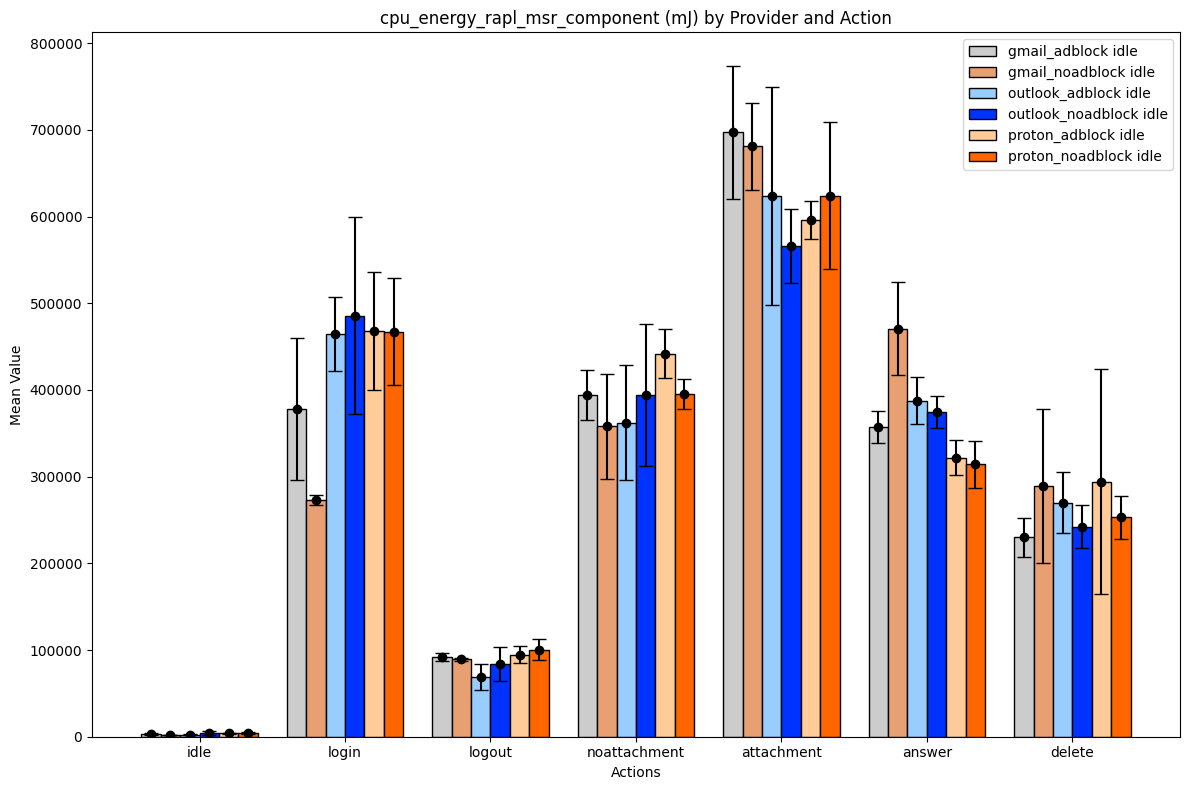

,idle,login,logout,noattachment,attachment,answer,delete
gmail_adblock,1282.395239,89054.4,26150.2,96228.4,154304.6,100808.2,81911.4
gmail_noadblock,975.843374,74099.2,23372.2,93702.6,149642.0,107151.2,83562.6
outlook_adblock,1060.824125,86398.2,24078.2,90811.6,148996.6,98184.6,83394.8
outlook_noadblock,1343.776262,96409.4,29104.2,89617.8,148300.8,98423.2,82220.4
proton_adblock,1427.524745,100196.4,30932.4,102955.0,157910.8,98729.8,84504.6
proton_noadblock,1409.109262,101488.6,32943.4,104900.6,159020.6,97366.8,84517.4


,idle,login,logout,noattachment,attachment,answer,delete
gmail_adblock,205.331803,10677.783264,3153.941242,2628.179644,2957.2491,710.95862,1280.576058
gmail_noadblock,2.723392,167.580906,83.25479,2791.364656,1442.550935,3194.448647,2543.361366
outlook_adblock,172.65548,9011.609943,3614.259006,2295.764326,3697.657886,2047.861773,2335.148509
outlook_noadblock,232.932465,9267.380614,3448.914345,9801.164694,1660.651848,1145.34648,1461.884072
proton_adblock,34.494587,2948.396758,938.09394,1623.311307,1096.31262,1373.6926,4949.99962
proton_noadblock,33.450692,4003.424614,5006.481024,1960.139444,3670.021777,1925.752881,1788.4518


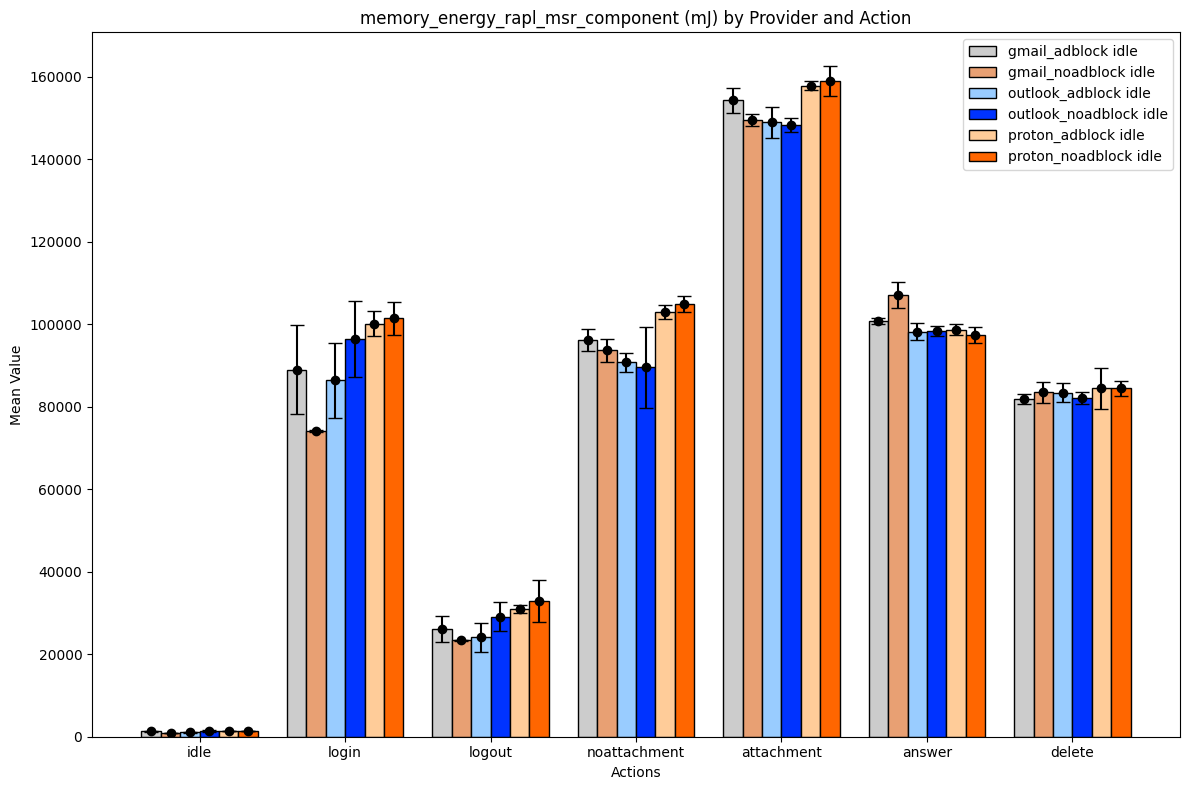

,idle,login,logout,noattachment,attachment,answer,delete
gmail_adblock,89317028.683033,2640182437.4,2103811276.4,3739410619.0,26316598387.0,5912601791.0,3515836021.8
gmail_noadblock,97385217.041446,3133214727.2,2338839212.2,5997715356.2,29053528562.200001,6258268014.2,2688161183.6
outlook_adblock,320245947.247103,14984970169.200001,7269076785.2,5371930862.2,29863363848.400002,6197732743.8,3902750928.8
outlook_noadblock,156389073.698391,6674312966.6,3608620865.4,9131793610.200001,34976583488.800003,8209599415.2,5404749130.6
proton_adblock,103985106.569938,3532596031.8,2385418185.4,1704276979.0,21475803293.400002,5800162304.0,1390948722.8
proton_noadblock,168348068.009356,6562759539.6,4187984739.0,8050765635.4,31345699546.599998,12596866409.799999,6730452233.6


,idle,login,logout,noattachment,attachment,answer,delete
gmail_adblock,998570.046153,45971156.636372,20791638.224771,18396086.389098,264712184.407754,642778445.111398,40424196.974707
gmail_noadblock,2691682.198895,163368878.604435,67877071.025276,181919962.21557,431195543.514839,11772927.203156,488652422.254077
outlook_adblock,113243887.259015,5930594553.239662,2535372026.83412,479468709.40679,1118673185.464117,469915778.801015,140142319.047851
outlook_noadblock,11583932.273427,597718235.848118,270555237.502151,537935153.539229,3308612746.555369,950346402.519155,1225137039.146778
proton_adblock,12054553.040696,613350055.428182,262891595.904,23550295.514574,1077227361.619812,71166358.685894,2257738.634884
proton_noadblock,6574783.833136,304175372.389638,808999232.929145,591118805.176286,300017041.594419,70032201.269026,484126742.868256


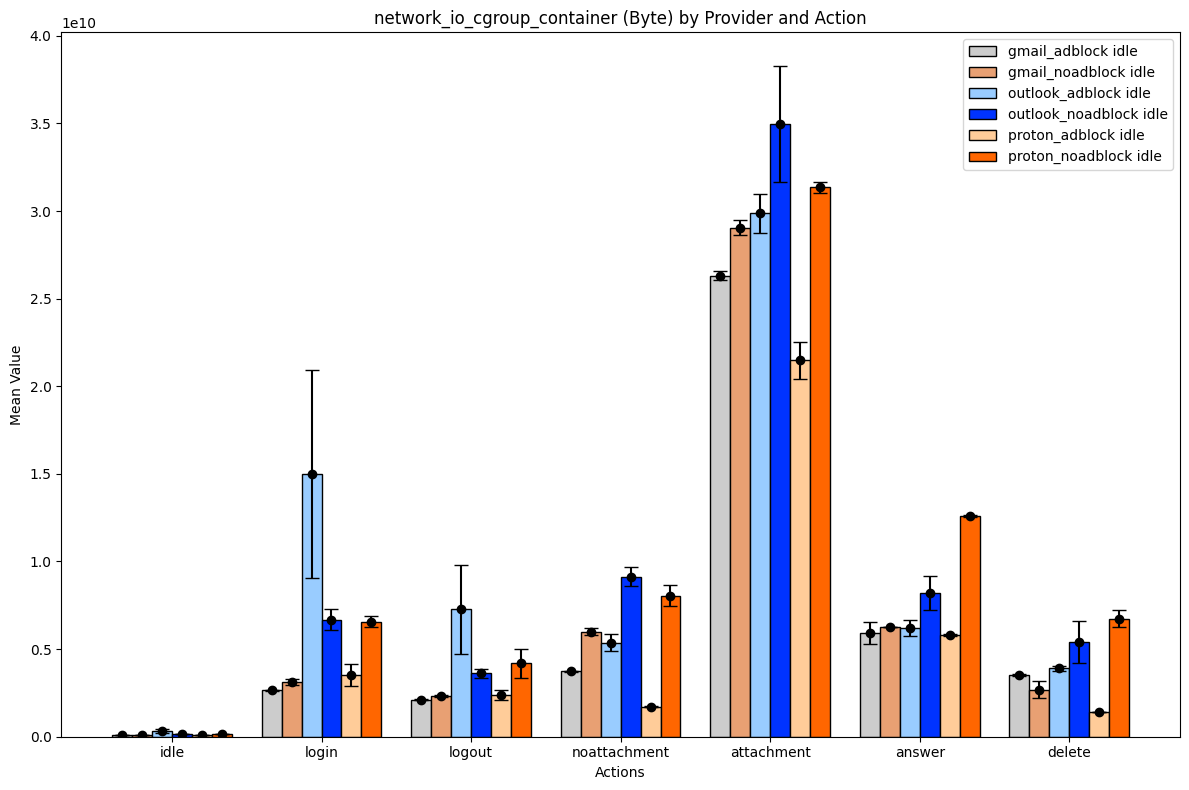

,idle,login,logout,noattachment,attachment,answer,delete
gmail_adblock,19519.464152,1445179.2,451188.6,1358082.6,2233080.6,1434934.8,1174761.8
gmail_noadblock,19291.379446,1408468.8,448893.4,1334105.4,2179374.8,1436929.0,1187874.6
outlook_adblock,19382.426004,1548506.0,434834.6,1337023.8,2166364.2,1464393.2,1205515.6
outlook_noadblock,19658.831037,1534432.2,440756.4,1342353.2,2129986.6,1441827.8,1194244.0
proton_adblock,19875.062658,1490277.0,446589.4,1535407.0,2343928.2,1403702.2,1197640.8
proton_noadblock,20004.955367,1494150.6,485020.4,1532674.2,2336167.0,1398569.4,1185573.0


,idle,login,logout,noattachment,attachment,answer,delete
gmail_adblock,359.273593,31229.478801,3298.226226,17330.212031,34020.586571,18781.574763,7262.722393
gmail_noadblock,2.159684,3534.837954,2994.863443,21257.017567,35969.887764,15015.469876,21649.497201
outlook_adblock,159.160057,10664.663952,5909.885975,12362.589751,48556.591665,13366.816964,17963.822829
outlook_noadblock,598.481929,42812.226232,6731.001132,31083.286862,14426.701336,8320.535233,7008.955443
proton_adblock,275.819367,33864.575409,6181.516597,16417.020826,22499.25552,11382.337412,30735.328359
proton_noadblock,328.553262,32596.698689,76648.780135,21829.799279,34061.152547,15882.51734,9473.41839


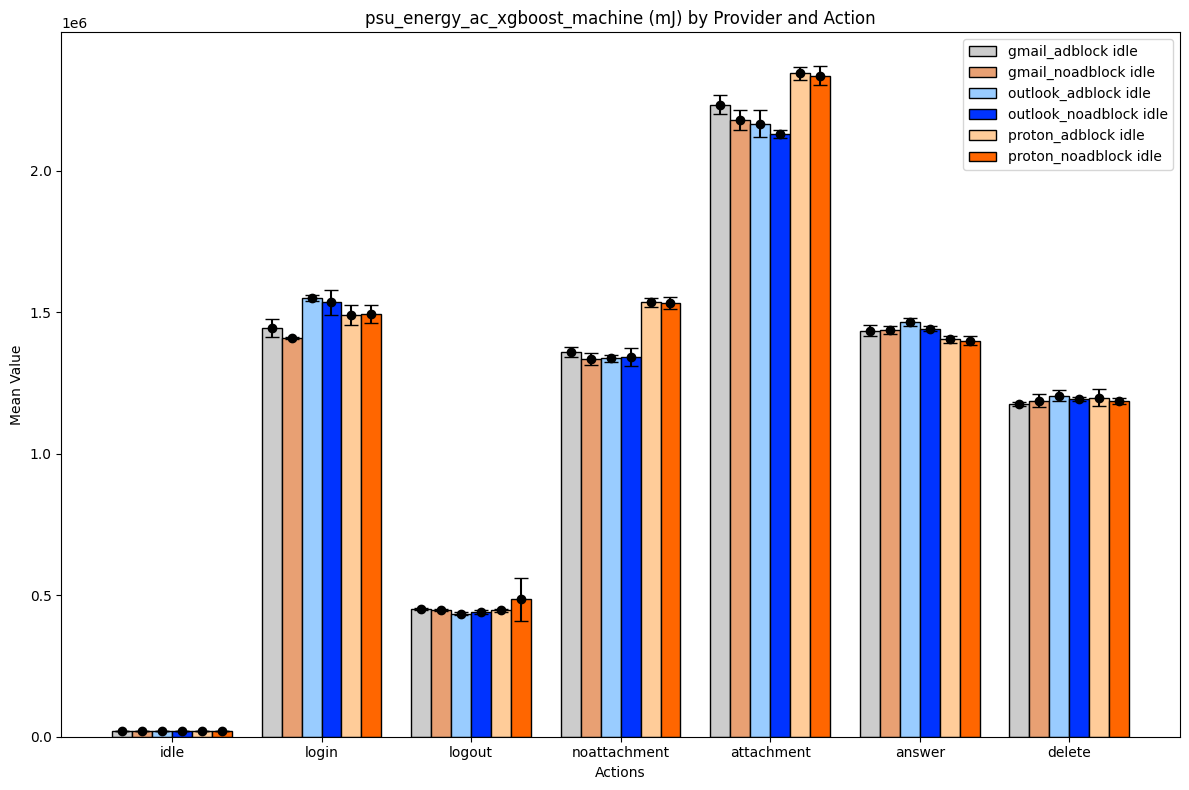

In [176]:
means_and_stds = compute_means_and_stds(metric_dataframes)

for metric in METRICS:
    mean_df, sd_df = means_and_stds[metric]
    plot_metrics_bars(mean_df, sd_df, metric)

## Here we convert the mean measurment into GHG emissions

In [204]:
e_intensity = 69*2.7778e-7*10e-3 #69gr/kWH * 2.777e-7kWh/J * 1000 mJ

g_CO2_USER = means_and_stds['psu_energy_ac_xgboost_machine'][0] * e_intensity
display(g_CO2_USER.head())



,idle,login,logout,noattachment,attachment,answer,delete
gmail_adblock,0.003741,0.276995,0.086479,0.260301,0.428011,0.275031,0.225164
gmail_noadblock,0.003698,0.269959,0.086039,0.255706,0.417717,0.275414,0.227678
outlook_adblock,0.003715,0.296799,0.083344,0.256265,0.415223,0.280678,0.231059
outlook_noadblock,0.003768,0.294102,0.084479,0.257286,0.408251,0.276353,0.228899
proton_adblock,0.003809,0.285639,0.085597,0.294289,0.449256,0.269045,0.22955


In [209]:
ratio_network = 186e6*10e6/4.8e21 #g/Byte
g_CO2_NETWORK = means_and_stds['network_io_cgroup_container'][0] * ratio_network
display(g_CO2_NETWORK.head())

,idle,login,logout,noattachment,attachment,answer,delete
gmail_adblock,34.610349,1023.070694,815.22687,1449.021615,10197.681875,2291.133194,1362.386458
gmail_noadblock,37.736772,1214.120707,906.300195,2324.114701,11258.242318,2425.078856,1041.662459
outlook_adblock,124.095305,5806.675941,2816.767254,2081.623209,11572.053491,2401.621438,1512.315985
outlook_noadblock,60.600766,2586.296275,1398.340585,3538.570024,13553.426102,3181.219773,2094.340288
proton_adblock,40.294229,1368.880962,924.349547,660.407329,8321.873776,2247.562893,538.99263


In [210]:
ratio_server = 126e6*10e6/4.8e21 #g/Byte
g_CO2_SERVER = means_and_stds['network_io_cgroup_container'][0] * ratio_server
display(g_CO2_SERVER.head())

,idle,login,logout,noattachment,attachment,answer,delete
gmail_adblock,23.44572,693.04789,552.25046,981.595287,6908.107077,1552.05797,922.906956
gmail_noadblock,25.563619,822.468866,613.945293,1574.400281,7626.551248,1642.795354,705.642311
outlook_adblock,84.064561,3933.554669,1908.132656,1410.131851,7839.13301,1626.904845,1024.472119
outlook_noadblock,41.052132,1752.007154,947.262977,2397.095823,9181.353166,2155.019846,1418.746647
proton_adblock,27.29609,927.306458,626.172274,447.372707,5637.398365,1522.542605,365.12404
